# Simple demo on the MMD
### Packages

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

### Some utils

In [78]:
# Generate n points on a circle of radius R with Gaussian noise of standard deviation noise
def noisy_circle(n: int, R: int, noise: float) -> np.ndarray:
    t = 2 * np.pi * np.random.rand(n)
    X = R * np.column_stack((np.cos(t), np.sin(t))) + noise * np.random.randn(n, 2)
    return X

# Generate n points on a circle of radius R without any noise
def circle(n: int, R: int) -> np.ndarray:
    t = np.linspace(0, 2 * np.pi, n)
    X = R * np.column_stack((np.cos(t), np.sin(t)))
    return X

# Define the plotting function
def plot_fitted_model(index: int, R2: np.ndarray, mmds: np.ndarray, X: np.ndarray, save_enabled: bool) -> None:
    plt.figure(figsize=(10,5)) 
    # Plot 1
    plt.subplot(1,2,1) 
    # Plot the MMD versus Radius
    plt.plot(R2, mmds)
    plt.plot(R2[index], mmds[index], 'ro', markersize=10)
    plt.xlabel("Radius")
    plt.ylabel("Maximum Mean Discrepancy")
    plt.title("MMD versus Radius")
    # Plot 2
    plt.subplot(1,2,2) 
    # Plot the Input Data
    plt.scatter(X[:, 0], X[:, 1], label="Input data")
    perfect = circle(100, R2[index])
    plt.scatter(perfect[:, 0], perfect[:, 1], label="Fitted model")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Fitted model on the Input Data")
    plt.legend()
    # If save_enabled = True when you want to save the figure
    if save_enabled and index in [22, 49, 73]:
        plt.savefig(f'output_figure_{index}.png')
    plt.show()

### Define a simple kernel

In [79]:
# Define the Gaussian kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

### Generate some data

In [80]:
# Set seed
np.random.seed(0)
# Hyperparameters
n = 100
R = 20
noise = 1
# Generate the data
X = noisy_circle(n, R, noise)
# Generate 100 Radii ranging from 15 to 25
R2 = np.linspace(15, 25, 100)
# Assign an array for the MMDs
mmds = np.zeros(100)

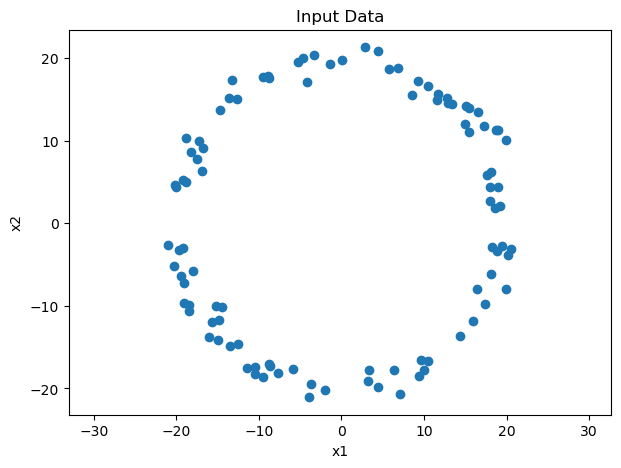

In [81]:
# Visualise
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Input Data")
plt.axis('equal')
#plt.savefig('Input_Data.png')
plt.show()

### Compute the MMD - the interesting part!

In [82]:
# Generate the kernelmatrix over the coordinates of the **input** data
K1 = kernel(X)
# Generate the MMDs
for i in range(n):
    # Generate the model circle
    A = circle(100, R2[i])
    # Generate the kernelmatrix over the coordinates of the model circle
    K2 = kernel(A)
    # Generate the kernelmatrix over the coordinates of the **input data and the model circle**
    K3 = kernel(X, A)
    # Calculate the MMD
    mmd = np.mean(K1) - 2 * np.mean(K3) + np.mean(K2)
    # Add the MMD to the mmds array
    mmds[i] = mmd

### Minimum MMD

In [83]:
# Find the Radius with the minimum MMD
index = np.argmin(mmds)
print("The Radius with the minimum MMD is: ", R2[index])
print("The Radius of the original circle is: ", R)

The Radius with the minimum MMD is:  19.949494949494948
The Radius of the original circle is:  20


### Let's visualise! - another interesting part

In [86]:
# For saving figure
save_enabled = False
# Call the plotting function
widgets.interact(plot_fitted_model, index = (0, len(mmds)-1, 1), mmds = widgets.fixed(mmds), R2 = widgets.fixed(R2), X = widgets.fixed(X), save_enabled = widgets.fixed(save_enabled))

interactive(children=(IntSlider(value=49, description='index', max=99), Output()), _dom_classes=('widget-inter…

<function __main__.plot_fitted_model(index: int, R2: numpy.ndarray, mmds: numpy.ndarray, X: numpy.ndarray, save_enabled: bool) -> None>